# Proyecto 2: Análisis del mercado inmobiliario

#### Comentarios sobre el Proyecto 1

En una primera instancia se siguió las consignas de Acámica en cuanto al filtrado de los datos. Así se obtuvo un modelo optimizado de k-vecinos más cercanos con las siguientes métricas de desempeño:

- Raíz del error cuadrático medio en Train: 56503.24301686958
- Raíz del error cuadrático medio en Test: 141814.47381098755

Luego, se analizaron dos filtrados diferentes. En un primer lugar, se filtraron los outliers mediante el rango intercuartílico y por último, se dividió la distriución de tres variables (prices, surface_covered y surface_total) en ventiles para luego eliminar los dos últimos en concepto de ouliers.

El resultado obtenido es un modelo de k-vecinos más cercanos con las siguientes métricas de desempeño:

- Raíz del error cuadrático medio en Train: 69214.9221356027
- Raíz del error cuadrático medio en Test: 160755.58171403917

Claramente obtuvimos mejores resultados con el filtrado tradicional. Cabe destacar que estas métricas se obtienen con el filtrado mediante las consignas de Acámica.

Dicho esto, se parte de las siguientes métricas que buscaremos optimizar mediante el Proyecto 2:

- Raíz del error cuadrático medio en Train: 56503.24301686958
- Raíz del error cuadrático medio en Test: 141814.47381098755

### Proyecto 2: consigna

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

#### PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

    1.Detección y eliminación de Outliers
    1.Encoding
    1.Imputación de valores faltantes
    1.Escalado de datos
    1.Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

#### PARTE B - Modelos Avanzados

1.Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

    1.Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
    1.Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

#### PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

-¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

-¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

#### DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

import scipy as sp
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.style.use('ggplot')

Cargo el dataset de Properati

In [3]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [4]:
df.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


### Parte A - Transformación de Datos

#### A.1) Outliers

Vamos a analizar las variables `rooms`, `bedrooms` y `bathrooms` para observar su distribución y determinar si sus valores máximos son outliers o no.

In [5]:
round(df["rooms"].value_counts().sort_index() / len(df["rooms"]) * 100, 2)

1.0      8.94
2.0     28.15
3.0     30.63
4.0     20.00
5.0      7.22
6.0      2.83
7.0      1.24
8.0      0.55
9.0      0.16
10.0     0.15
11.0     0.03
12.0     0.04
13.0     0.01
14.0     0.01
15.0     0.01
16.0     0.01
18.0     0.00
20.0     0.00
21.0     0.00
24.0     0.00
25.0     0.00
26.0     0.00
30.0     0.00
32.0     0.00
35.0     0.00
Name: rooms, dtype: float64

In [6]:
round(df["bedrooms"].value_counts().sort_index() / len(df["bedrooms"]) * 100, 2)

0.0      4.87
1.0     33.89
2.0     31.37
3.0     21.45
4.0      6.19
5.0      1.41
6.0      0.52
7.0      0.18
8.0      0.04
9.0      0.02
10.0     0.02
11.0     0.01
12.0     0.01
13.0     0.00
14.0     0.01
15.0     0.00
Name: bedrooms, dtype: float64

In [7]:
round(df["bathrooms"].value_counts().sort_index() / len(df["bathrooms"]) * 100, 2)

1.0     56.58
2.0     26.64
3.0      8.90
4.0      2.69
5.0      0.80
6.0      0.22
7.0      0.07
8.0      0.01
9.0      0.01
10.0     0.01
11.0     0.01
12.0     0.00
13.0     0.00
14.0     0.00
Name: bathrooms, dtype: float64

Graficamos un boxplot y observamos que, para la variable `bathrooms` valores superiores a `4` representan outliers. En cuanto a `bedrooms` y `rooms` los outliers se encuentran a partir de las `6` y `7` unidades respectivamente.

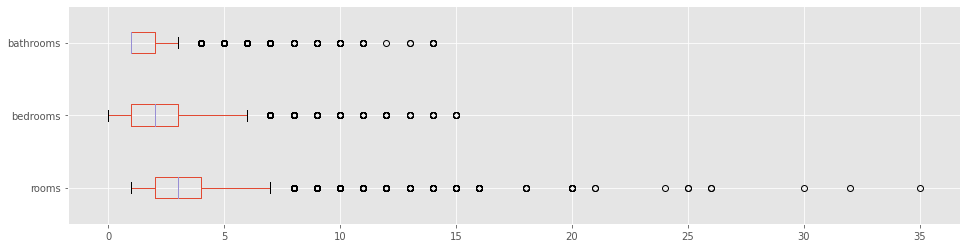

In [8]:
fig = plt.figure(figsize = (16, 4))
df.boxplot(column = ["rooms", "bedrooms", "bathrooms"], vert = False)
plt.show()

Dicho esto, se procede a eliminar aquellos valores por encima de los límites mencionados anteriormente. Esto se realiza con el rango intercuartílico para las tres variables.

In [9]:
for i in ["rooms", "bedrooms", "bathrooms"]:
    q1, q3 = df[i].quantile(0.25), df[i].quantile(0.75)
    
    rango_interc = q3 - q1
    
    upper = q3 + 1.5 * rango_interc
    lower = q1 - 1.5 * rango_interc
    
    df = df[(df[i] > lower) & (df[i] < upper)]

Observamos el boxplot nuevamente

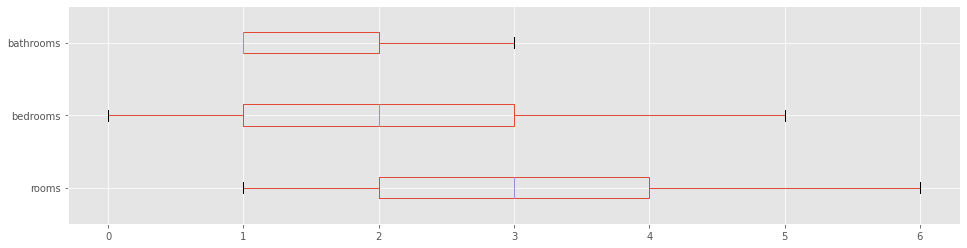

In [10]:
fig = plt.figure(figsize = (16, 4))
df.boxplot(column = ["rooms", "bedrooms", "bathrooms"], vert = False)
plt.show()

Ahora se analizan las variables `surface_covered` y `surface_total` en busca de outliers

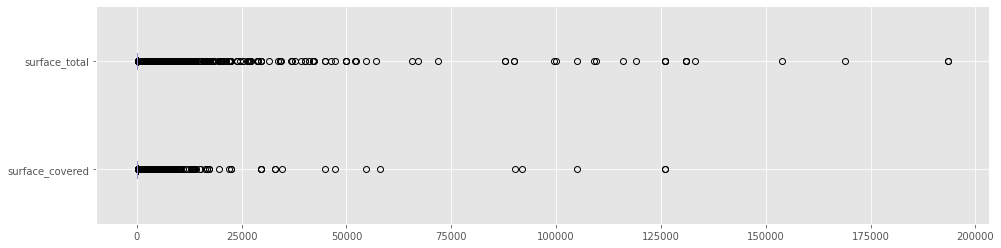

In [11]:
fig = plt.figure(figsize = (16, 4))
df.boxplot(column = ["surface_covered", "surface_total"], vert = False)
plt.show()

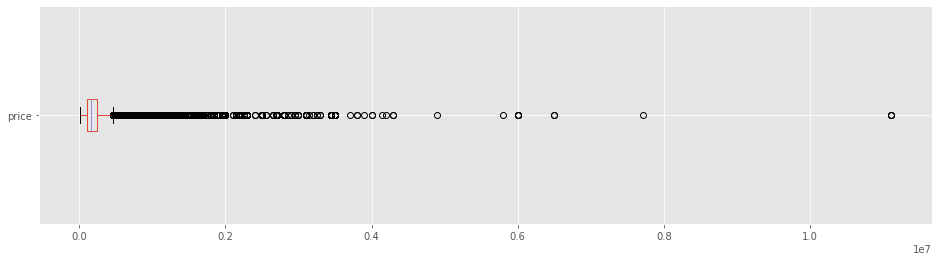

In [12]:
fig = plt.figure(figsize = (16, 4))
df.boxplot(column = ["price"], vert = False)
plt.show()

Claramente los valores máximos de ambas variables son outliers, por lo que se eliminan mediante la técnica del rango intercuartílico.

In [20]:
for i in ["surface_covered", "surface_total", "price"]:
    q1, q3 = df[i].quantile(0.25), df[i].quantile(0.75)
    
    rango_interc = q3 - q1
    
    upper = q3 + 1.5 * rango_interc
    lower = q1 - 1.5 * rango_interc
    
    df = df[(df[i] > lower) & (df[i] < upper)]

Observamos el boxplot nuevamente

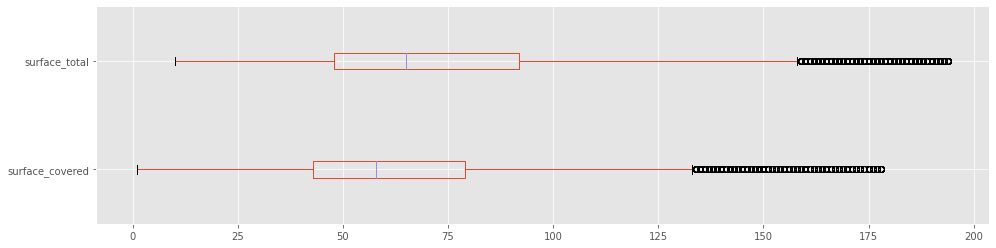

In [21]:
fig = plt.figure(figsize = (16, 4))
df.boxplot(column = ["surface_covered", "surface_total"], vert = False)
plt.show()

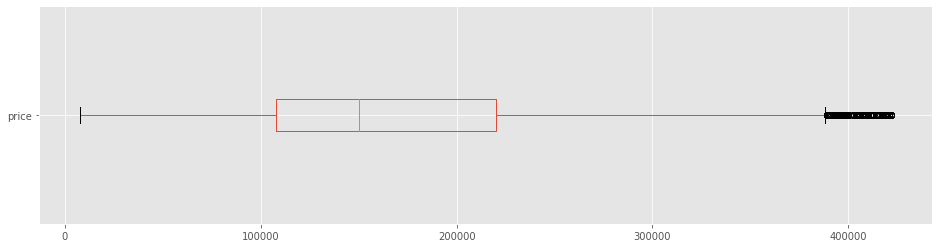

In [22]:
fig = plt.figure(figsize = (16, 4))
df.boxplot(column = ["price"], vert = False)
plt.show()

#### A.2) Imputacíón de valores faltantes

In [23]:
df.isna().sum()

start_date            0
end_date              0
created_on            0
lat                5977
lon                5977
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

Al filtrar los valores atípicos, hemos eliminado observaciones con valores faltantes en algunos campos. Solamente conservamos NAs en las columnas `lat` y `lon` que estudiaremos a continuación.

In [24]:
df[df["lat"].isnull()]["property_type"].value_counts() / len(df[df["lat"].isnull()]["property_type"]) * 100

Departamento    92.220177
PH               5.169818
Casa             2.275389
Oficina          0.284424
Otro             0.050192
Name: property_type, dtype: float64

In [25]:
df[df["lon"].isnull()]["property_type"].value_counts() / len(df[df["lon"].isnull()]["property_type"]) * 100

Departamento    92.220177
PH               5.169818
Casa             2.275389
Oficina          0.284424
Otro             0.050192
Name: property_type, dtype: float64

El 93% de los valores faltantes en `lat` y `lon` se encuentran en propiedades del tipo `Departamentos`. Debido a que estas variables no serán inputs de nuestros modelos predictivos, no se realizará ninguna imputación de valores faltantes. 

#### A.3) Encoding

Tenemos las siguientes variables categóricas:
- `property_type`
- `l2`
- `l3`

Para la variable `property_type` genero variables dummy por cada tipo de propiedad

In [26]:
df = pd.concat([df.drop('property_type', axis = 1),
                pd.get_dummies(df['property_type'])], axis=1)

Variales `l2` y `l3`

In [27]:
categorical_vars = ["l2", "l3"]

Instancio `OneHotEncoder`

In [28]:
enc = OneHotEncoder(handle_unknown = 'ignore')

Creo un DataFrame con los nuevos atributos

In [29]:
enc_df = pd.DataFrame(enc.fit_transform(df[categorical_vars]).toarray())

Les asigno los nombres de los valores originales de `l2` y `l3`

In [30]:
enc_df.columns = list(enc.get_feature_names(categorical_vars))

Junto los dos DataFrames, el original y el de encoding

In [31]:
df.reset_index(drop = True, inplace = True)

In [32]:
df = df.join(enc_df)

In [33]:
df.drop(categorical_vars, axis = 1, inplace = True)

#### A.4) Generación de nuevas variables predictoras

Se generan columnas con el logaritmo de `surface_total` y `surface_covered` para obtener una distribución normal (o linealizar la distribución en su defecto) y así analizar si son mejores predictores del precio.

In [34]:
for i in ["surface_total", "surface_covered"]:
    df[i + "_log"] = np.log(df[i])

#### A.5) Escalado de datos

In [35]:
scaler = StandardScaler()

In [36]:
df.drop(["lat", "lon", "start_date", "end_date", "created_on", "l1", "currency", "title", "description", "operation_type"], 
        axis = 1, inplace = True)

In [37]:
X = df.drop("price", axis = 1)
y = df["price"]

In [38]:
scaler.fit(X)

StandardScaler()

In [39]:
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

#### A.6) Reducción de dimensionalidad (PCA)

In [40]:
# pca = PCA(n_components = 2)

In [41]:
# X_nuevo = pca.fit_transform(X) 

In [42]:
# plt.scatter(X_nuevo[:,0], X_nuevo[:,1], c = y)
# plt.xlabel('X_nuevo[:,0]')
# plt.ylabel('X_nuevo[:,1]')

### Parte B - Modelos Avanzados

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### B.1) Modelo Proyecto 1

En el Proyecto 1 se seleccionó un modelo de K-Vecinos más cercanos como el mejor predictor del precio de los inmuebles. El mismo nos arrojaba las siguientes métricas:
- Raíz del error cuadrático medio en Train: 56.503,24
- Raíz del error cuadrático medio en Test: 141.814,47

El objetivo de este proyecto es reducir dicho error, para lo cual comenzaremos aplicando este modelo optimizado en el Proyecto 1 y luego se desarrollarán modelos más avanzados para intentar mejorar las métricas.

In [44]:
knn_regressor_opt = KNeighborsRegressor(n_neighbors = 4,
                                        weights = "distance",
                                        algorithm = "auto",
                                        n_jobs = -1)

In [45]:
knn_regressor_opt.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=4, weights='distance')

In [46]:
y_train_pred_knn_opt = knn_regressor_opt.predict(X_train)
y_test_pred_knn_opt = knn_regressor_opt.predict(X_test)

rmse_train_knn_opt = np.sqrt(mean_squared_error(y_train, y_train_pred_knn_opt))
rmse_test_knn_opt = np.sqrt(mean_squared_error(y_test, y_test_pred_knn_opt))

print("El RMSE del modelo KNeighborsRegressor del Proyecto 1 para train es:", rmse_train_knn_opt)
print("El RMSE del modelo KNeighborsRegressor del Proyecto 1 para test es:", rmse_test_knn_opt)

El RMSE del modelo KNeighborsRegressor del Proyecto 1 para train es: 14056.376698217658
El RMSE del modelo KNeighborsRegressor del Proyecto 1 para test es: 32193.91936703086


#### B.2) Decision Tree Regressor

In [47]:
tree = DecisionTreeRegressor()

In [48]:
param_tree = {"criterion": ["mse", "friedman_mse"],
              "max_depth": sp.stats.randint(2, 20),
              "min_samples_split": sp.stats.randint(2, 20)}

In [49]:
tree_opt = RandomizedSearchCV(tree, param_tree, n_iter=100, random_state=42, cv=5)

In [50]:
tree_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'criterion': ['mse', 'friedman_mse'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019946EC76D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019946EC7F70>},
                   random_state=42)

In [51]:
y_train_pred_tree_opt = tree_opt.predict(X_train)
y_test_pred_tree_opt = tree_opt.predict(X_test)

rmse_train_tree_opt = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_opt))
rmse_test_tree_opt = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_opt))
print("El RMSE del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train es:", rmse_train_tree_opt)
print("El RMSE del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test es:", rmse_test_tree_opt)

El RMSE del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train es: 31573.657916492033
El RMSE del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test es: 38767.614466444014


#### B.3) BaggingRegressor con DecisionTreeRegressor

In [52]:
bagging = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                           bootstrap = True,
                           bootstrap_features= False,
                           n_estimators = 1000,
                           n_jobs = -1)

In [53]:
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1)

In [54]:
y_train_pred_bagging = bagging.predict(X_train)
y_test_pred_bagging = bagging.predict(X_test)

rmse_train_bagging = np.sqrt(mean_squared_error(y_train, y_train_pred_bagging))
rmse_test_bagging = np.sqrt(mean_squared_error(y_test, y_test_pred_bagging))

print("El RMSE del BaggingRegressor con DecisionTreeRegressor para train es:", rmse_train_bagging)
print("El RMSE del BaggingRegressor con DecisionTreeRegressor para test es:", rmse_test_bagging)

El RMSE del BaggingRegressor con DecisionTreeRegressor para train es: 16459.295933377052
El RMSE del BaggingRegressor con DecisionTreeRegressor para test es: 31026.08713242086


#### B.4) RandomForest

In [55]:
forest = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)

In [56]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [57]:
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_pred_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_pred_forest))

print("El RMSE del RandomForest para train es:",rmse_train_forest)
print("El RMSE del RandomForest para test es:",rmse_test_forest)

El RMSE del RandomForest para train es: 16247.742621069401
El RMSE del RandomForest para test es: 30181.522058619947


#### B.5) AdaBoost optimizado con RandomSearchCV

In [58]:
param_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
    'loss': ['linear', 'square', 'exponential']
    }

In [59]:
adaboost = RandomizedSearchCV(AdaBoostRegressor(),
                              param_distributions = param_ada,
                              cv = 3,
                              n_iter = 10,
                              n_jobs = -1)

In [60]:
adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [61]:
y_train_pred_adaboost = adaboost.predict(X_train)
y_test_pred_adaboost = adaboost.predict(X_test)

rmse_train_adaboost = np.sqrt(mean_squared_error(y_train, y_train_pred_adaboost))
rmse_test_adaboost = np.sqrt(mean_squared_error(y_test, y_test_pred_adaboost))

print("El RMSE del AdaBoost optimizado con RandomSearchCV para train es:",rmse_train_adaboost)
print("El RMSE del AdaBoost optimizado con RandomSearchCV para test es:",rmse_test_adaboost)

El RMSE del AdaBoost optimizado con RandomSearchCV para train es: 52506.541461223445
El RMSE del AdaBoost optimizado con RandomSearchCV para test es: 52959.110492173466


#### B.6) Polinomial Regression

In [62]:
linear = LinearRegression()

In [63]:
linear.fit(X_train, y_train)

LinearRegression()

In [64]:
y_train_pred_linear = linear.predict(X_train)
y_test_pred_linear = linear.predict(X_test)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))

print("El RMSE del Polinomial Regression para train normal es:", rmse_train_linear)
print("El RMSE del Polinomial Regression para test normal es:", rmse_test_linear)

El RMSE del Polinomial Regression para train normal es: 41573.06567054092
El RMSE del Polinomial Regression para test normal es: 1669404141604239.5


#### B.7) Ridge Regression optimizado mediante RandomSearchCV

In [65]:
params_ridge = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [66]:
ridge = Ridge()

In [67]:
ridge = RandomizedSearchCV(ridge, 
                           param_distributions = params_ridge, 
                           cv = 3, 
                           n_iter = 10, 
                           n_jobs = -1)

In [68]:
ridge.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.0001,
                                                  0.001, 0.01, 1, 5, 10, 20]})

In [69]:
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("El RMSE del Ridge Regression optimizado mediante RandomSearchCV para train normal es:", rmse_train_ridge)
print("El RMSE del Ridge Regression optimizado mediante RandomSearchCV para test normal es:", rmse_test_ridge)

El RMSE del Ridge Regression optimizado mediante RandomSearchCV para train normal es: 41571.6686040644
El RMSE del Ridge Regression optimizado mediante RandomSearchCV para test normal es: 42008.231088872475


#### B.8) Selección del mejor predictor

Claramente vimos que todos los modelos tienen un desempeño superior al Proyecto 1. Ahora resta definir cuál de todos será el elegido como mejor predictor. Para ello, vamos a graficar los RMSE del Random Forest y del KNeighbors Regressor para sacar una conclusión.

Modelo: Proyecto 1 (KNeighbors Regressor sobre el nuevo dataset)
RMSE en Train: 14056.38
RMSE en Test: 32193.92


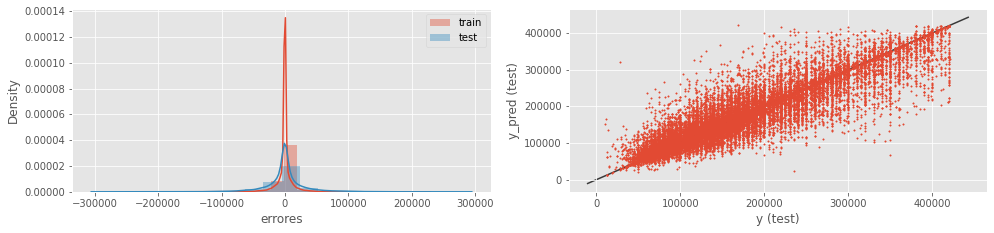

Modelo: Random Forest
RMSE en Train: 16247.74
RMSE en Test: 30181.52


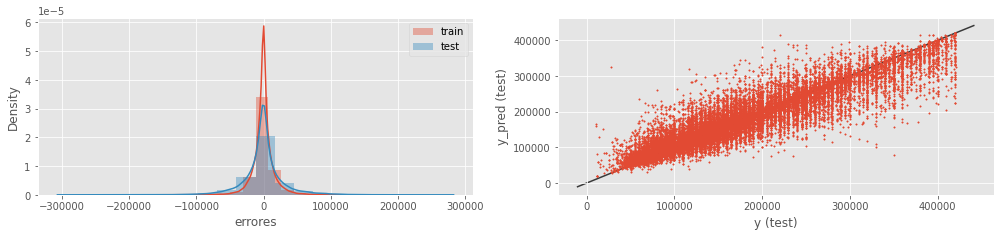

In [70]:
print(f"Modelo: Proyecto 1 (KNeighbors Regressor sobre el nuevo dataset)")
print(f'RMSE en Train:', round(rmse_train_knn_opt, 2))
print(f'RMSE en Test:', round(rmse_test_knn_opt, 2))
    
plt.figure(figsize = (14,6))

plt.subplot(2,2,1)
sns.distplot(y_train - y_train_pred_knn_opt, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_knn_opt, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
    
ax = plt.subplot(2,2,2)
ax.scatter(y_test, y_test_pred_knn_opt, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------

print(f"Modelo: Random Forest")
print(f'RMSE en Train:', round(rmse_train_forest, 2))
print(f'RMSE en Test:', round(rmse_test_forest, 2))

plt.figure(figsize = (14,6))
    
plt.subplot(2,2,3)
sns.distplot(y_train - y_train_pred_forest, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_forest, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()
    
ax = plt.subplot(2,2,4)
ax.scatter(y_test, y_test_pred_forest, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

En resumen, el modelo Random Forest mejora mi predicción en un 78% si la comparo contra el Proyecto 1. Si lo hago contra el modelo utilizado en el proyecto anterior pero con el nuevo dataset, el Random Forest mejora la predicción en un 6%. En ambos casos el resultado es superior por lo que concluimos en que estamos ante el mejor modelo predictor del precio de los inmuebles.

### PARTE C - Interpretación de modelos

Si observamos la importancia de cada atributo en el modelo de Random Forest, vemos que las primeras diez variables son a priori las más intuitivas o que uno cree podrían captar la mayor variabilidad del dataset.

Se destaca la presencia de las variables creadas en este proyecto `surface_covered_log` y `surface_total_log` ya que aparecen en primer y tercer lugar respectivamente. Ambos atributos fueron creados tomando logaritmo de las variables originales a las que hacen referencia.

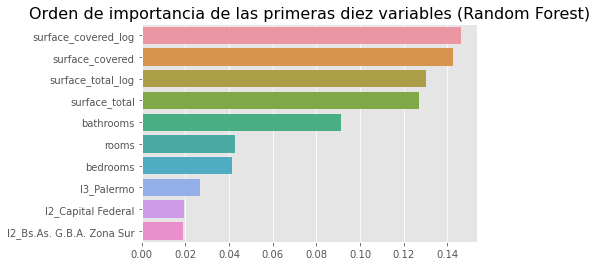

In [71]:
importances = forest.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1][:10]

plt.title("Orden de importancia de las primeras diez variables (Random Forest)", fontsize = 16)
plt.yticks(fontsize = 10, horizontalalignment = 'right')
sns.barplot(y = columns[indices], x = importances[indices])
plt.show()

Sumado a ello, observamos que al escoger tres árboles al azar el orden de importancias cambia. Esto se da porque el modelo de Random Forest genera una gran cantidad de árboles de decisión a los cuales les pasamos diferentes subconjuntos del dataset original y además, diferentes subconjuntos del total de atributos. Esto hace que veamos diferentes atributos en cada iteración del ensamble.

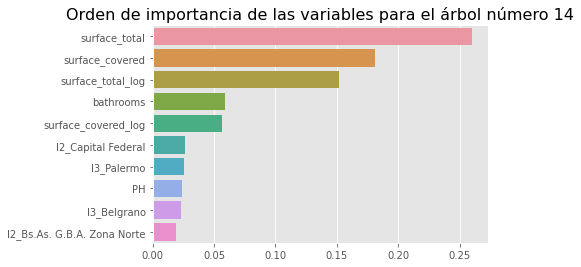

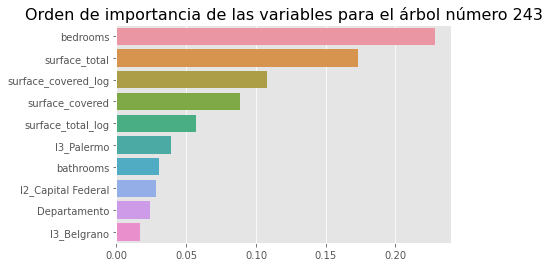

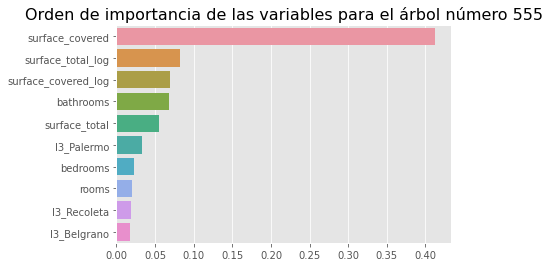

In [72]:
for i in [14, 243, 555]:
    importances = forest.estimators_[i].feature_importances_
    columns = X_train.columns
    indices = np.argsort(importances)[::-1][:10]

    plt.title(f"Orden de importancia de las variables para el árbol número {i}", fontsize = 16)
    plt.yticks(fontsize = 10, horizontalalignment = 'right')
    sns.barplot(y = columns[indices], x = importances[indices])
    plt.show()

Analizando la distribución de los errores, vemos que los mismos se distribuyen normal y están centrados en cero por lo que a priori se podría decir que el modelo parece acertado y no presenta sesgos.

In [73]:
y_errors = y_test_pred_forest - y_test

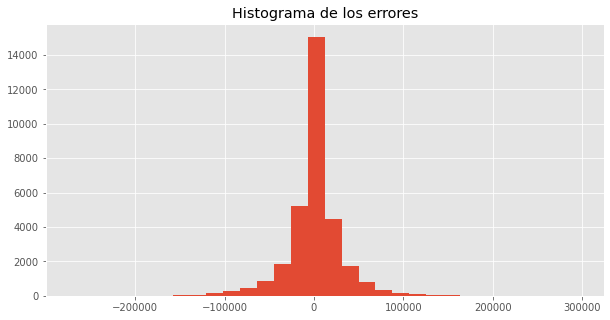

In [74]:
plt.figure(figsize = (10, 5))
plt.hist(y_errors, bins = 30)
plt.title("Histograma de los errores")
plt.show()

Pero, sin embargo, si comparamos los errores con los precios, pareciera que en los rangos de precios extremos (inferior y superior) se presentan los mayores desvíos. Esto es algo esperable de cualquier modelo, aunque podría ser una mejora a desarrollar en los próximos sprints.

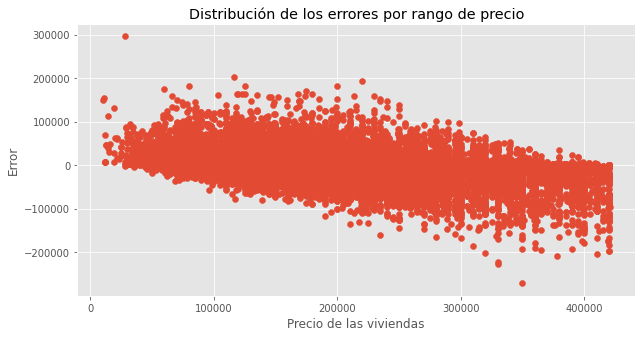

In [75]:
plt.figure(figsize = (10, 5))
plt.title("Distribución de los errores por rango de precio")
plt.scatter(y_test, y_errors)
plt.xlabel("Precio de las viviendas")
plt.ylabel("Error")
plt.show()

### DESAFÍO OPCIONAL

Vamos a aplicar técnicas de clustering para detectar posibles patrones y responder algunas preguntas del estilo:
- ¿Qué barrios se parecen más entre sí?
- ¿Qué tipos de propiedades se parecen más entre sí?

Comenzamos aplicando reducción de dimensionalidad mediante PCA para luego facilitar la visualización y así poder sacar conclusiones.

In [76]:
pca = PCA(n_components = 2)

In [77]:
X_pca = pca.fit_transform(X)

In [78]:
X_pca = pd.DataFrame(X_pca, index = df.index)

#### K-Means

Aplicamos el método del codo para definir la cantidad de clusters

In [79]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
lista_distancias_medias = []

# Entrenamos un modelo para cada numero de cluster que queremos testear
K = np.arange(2, 10)

for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters = k)
    km = km.fit(X_pca)
    
    # Tomamos la suma de las distancias para todas las instancias del dataset
    distancia_total = km.inertia_
    
    # Calculamos la distancia media y agregamos a la lista
    distancia_media = distancia_total / len(X_pca)
    lista_distancias_medias.append(distancia_media)

Se puede observar que el número óptimo de clusters es 3

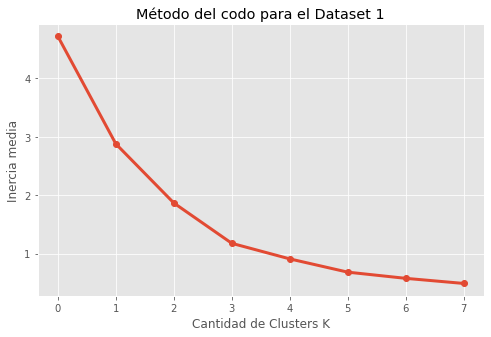

In [80]:
plt.figure(figsize = (8,5))

# Graficamos una linea continua y tambien unos puntos para resaltar los valores enteros de K.
plt.plot(lista_distancias_medias, "-o", lw = 3)

plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 1')

plt.show()

Instanciamos el modelo de KMeans con 3 clusters

In [81]:
kmeans = KMeans(n_clusters = 3, random_state = 0)

Ajustamos el modelo, generamos las etiquetas y los centros para luego graficar cada cluster con su centroide.

In [82]:
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

In [83]:
etiquetas = kmeans.labels_
centros = kmeans.cluster_centers_

Si observamos el gráfico, pareciera que KMeans no está ajustando correctamente los clusters.

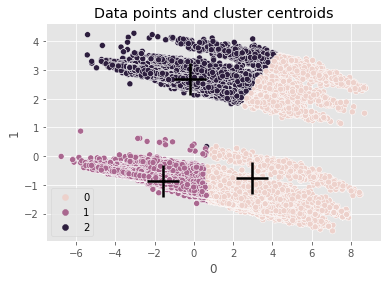

In [84]:
sns.scatterplot(X_pca.iloc[:, 0], X_pca.iloc[:, 1], hue = etiquetas)
sns.scatterplot(centros[:, 0], centros[:, 1], color = 'black', marker = "+", s = 1000)
plt.title('Data points and cluster centroids')
plt.show()

#### DBSCAN

Como una segunda aproximación a clustering, desarrollamos el método DBSCAN para mejorar el ajuste del modelo anterior. Utilizamos la base con los dos componentes del PCA al igual que en KMeans.

Instanciamos y ajustamos el modelo

In [85]:
db = DBSCAN(eps = 0.3, min_samples = 10)

In [86]:
db.fit(X_pca)

DBSCAN(eps=0.3, min_samples=10)

Obtengo el número de clusters

In [87]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [88]:
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 59


Defino una función para graficar luego los resultados

In [89]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

Si observamos el gráfico, a priori se puede afirmar que DBSCAN ajusta mucho mejor los clusters de nuesro dataset. A pesar de ello, aparece un tercer cluster para altos valores del primer componente y bajos valores del segundo (en color verde) que genera curiosidad y sería interesante focalizar el análisis en dichas observaciones para detectar posibles patrones o nuevas conclusiones.

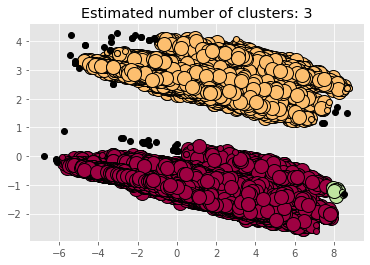

In [90]:
plot_DBSCAN(X_pca, labels, db, n_clusters)

Como conclusión general del proyecto, en primera medida se logró el objetivo de mejorar las métricas del proyecto anterior. Se optimizó el RMSE de 141.814,47 a 30.181,52 (78% de mejora).

A su vez, podría decirse que este error es alto para implementar en un negocio inmobiliario real. Se podrían recopilar más datos que ayuden a diferenciar los segmentos de precios, como por ejemplo:

- Tenencia de pileta
- Tenencia de asador
- Cercanía a lugares de interés (aeropuertos, terminal de colectivos, paradas de transporte público, etc)
- Remodelada o no
- Barrio privado o no

Estos features podrían ayudar a mejorar las predicciones. 

Otra alternativa es generar diferentes modelos según sea el tipo de propiedad, o por lo menos para los más representativos (Departamento, Casa y PH) para así no incurrir en desvíos dadas las diferentes distribuciones.

Para cerrar, considero que los resultados obtenidos son más que satisfactorios y aún queda mucho por explorar y mejorar, pero se transita el camino correcto.